# **Softmax Multinomial**

In [200]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
df = sns.load_dataset('iris')

In [202]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [203]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [204]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [205]:
X = df.drop('species',axis=1)
y = df['species']

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [207]:
x = X.to_numpy()

In [208]:
y = y.to_numpy()

In [209]:
clf = LogisticRegression(multi_class='multinomial')

In [210]:
clf.fit(X_train,y_train)

c:\Users\asada\miniconda3\envs\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [211]:
y_pred = clf.predict(X_test)

In [212]:
print(accuracy_score(y_test, y_pred))

1.0


In [213]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=encoder.classes_, index=encoder.classes_)

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


In [214]:
# prediction
query = np.array([[3.4,2.7,1.5,0.5]])
clf.predict_proba(query)

c:\Users\asada\miniconda3\envs\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.82370673e-01, 1.76288878e-02, 4.38993260e-07]])

In [215]:
clf.predict(query)

c:\Users\asada\miniconda3\envs\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [216]:
df1 = pd.read_csv('./dataset/mnist.csv')

In [232]:
df1.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [233]:
# apply pca 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = df1.drop('label',axis=1)
y = df1['label']
X = pca.fit_transform(X)


In [235]:
y.to_numpy()

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [238]:
# apply standard scaler to X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [239]:
y = y.to_numpy()

In [240]:
df2 = pd.DataFrame(X,columns=['pca1','pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10'])
df2['label'] = df1.label

In [241]:
df2.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,label
0,-1.143452,-1.410294,0.398961,0.280629,-0.197778,1.273283,-2.037719,0.271376,1.130559,0.711835,1
1,2.940659,-0.727121,-1.092310,0.780427,-1.079088,1.920962,1.949703,-0.560381,-0.025295,0.236872,0
2,-1.532840,-0.592434,0.146180,0.182096,-1.155519,-0.841640,1.305043,-0.969055,-0.633596,-0.092173,1
3,-0.286479,0.605375,-0.139631,1.767607,-1.038751,0.409460,-0.906384,0.877205,-0.148570,-1.042578,4
4,3.324793,-0.905802,-1.194199,0.438709,-1.589768,2.575576,1.683105,-0.812012,0.404921,0.625903,0


In [242]:
# split into X , y
X_ = df2.drop('label',axis=1)
y_ = df2['label']

In [243]:
X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.2,random_state=42)

In [244]:
clf = LogisticRegression(multi_class='multinomial')

In [245]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [246]:
y_pred = clf.predict(X_test)

In [247]:
print(accuracy_score(y_test, y_pred))

0.8008333333333333


c:\Users\asada\miniconda3\envs\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


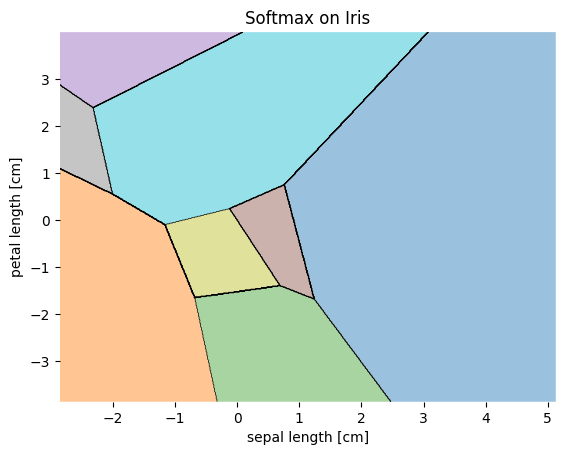

In [248]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plotting decision regions
plot_decision_regions(X, y, clf=clf, feature_index=[0,1], filler_feature_values={2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()